importar datos desde el DATASET y el libro de codigos que nos ayudará a limpiar variables.

In [443]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'dataset2.dta'
excel_file_path = 'Libro_de_codigos_Base_de_datos_Casen_2022(18marzo2024)(1).xlsx'
data = pd.read_stata(file_path, convert_categoricals=False)
data.shape

C:\Users\Seba\AppData\Local\Temp\ipykernel_2444\1872172907.py:15: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata(file_path, convert_categoricals=False)


(202231, 918)

eliminamos las filas con valores nulos o "0" en la variable dependiente

In [444]:
print("cantidad de datos antes del drop: ", data.shape[0])


data = data.dropna(subset=['ytrabajocor'])

# Eliminar filas con valores especiales en 'ytrabajocor'
valores_especiales = [-66, -88, -99]
data = data[~data['ytrabajocor'].isin(valores_especiales)]


print("cantidad de datos despues del drop: ", data.shape[0])
data.shape

cantidad de datos antes del drop:  202231
cantidad de datos despues del drop:  88976


(88976, 918)

# Limpieza de variables

Eliminacion de columnas con valores nulos mayor al 60%


In [445]:
umbral_nulos = 0.6
data = data.dropna(thresh=len(data) * (1 - umbral_nulos), axis=1)
data.shape

(88976, 495)

Eliminar columnas con tipo 'Timestamp' y tipo string

In [446]:
data = data.select_dtypes(exclude=['datetime', 'object'])
data.shape

(88976, 461)

Definición y eliminación de lista de variables personalizadas a eliminar

In [447]:
# Lista de variables personalizadas a eliminar
variables_limpieza = ['activ','cotiza','v27a', 'v27b', 'v28', 'v29a','v13_propia', 'v13_arrendada', 'v13_cedida', 'v13b_1', 'v13b_2', 'v13b_3', 'v13b_4', 'v13b_5', 'v13b_6', 'v13b_7','asal','h5_1a', 'h5_1b', 'h5_20', 'h5_2', 'n_nucleos', 'nucleo','r8a', 'r8b', 'r8c', 'r8d', 'r8e', 'r8f', 'r8g', 'r8h', 'r9a','v18','expr','expr_osig','varstrat','varunit','os_presente','e6a_asiste','e6a_no_asiste']  

# Cargar listas adicionales desde el archivo Excel
excel_file_path = 'Libro_de_codigos_Base_de_datos_Casen_2022(18marzo2024)(1).xlsx'
sheets = ['Y', 'Ing Cepal', 'Ing MDSF', 'HdR', 'PM', 'S', 'R', 'H']
for sheet in sheets:
    limpieza_variables = pd.read_excel(excel_file_path, sheet_name=sheet, usecols=[1], skiprows=2).iloc[:, 0].dropna().tolist()
    variables_limpieza += limpieza_variables
print(variables_limpieza)

# Variables a mantener
variables_mantener = ['sexo', 'ecivil', 'h7a', 'h7b', 'h7c', 'h7d', 'h7e', 'h7f', 'edad', 's13', 's16', 's28', 's27a', 's34a', 's34c', 'ytrabajocor', 'region', 'area']

# Eliminar variables a mantener de la lista de limpieza
for variable in variables_mantener:
    if variable in variables_limpieza:
        variables_limpieza.remove(variable)

# Eliminar variables personalizadas
data = data.drop(columns=variables_limpieza, errors='ignore')

data.shape()

['activ', 'cotiza', 'v27a', 'v27b', 'v28', 'v29a', 'v13_propia', 'v13_arrendada', 'v13_cedida', 'v13b_1', 'v13b_2', 'v13b_3', 'v13b_4', 'v13b_5', 'v13b_6', 'v13b_7', 'asal', 'h5_1a', 'h5_1b', 'h5_20', 'h5_2', 'n_nucleos', 'nucleo', 'r8a', 'r8b', 'r8c', 'r8d', 'r8e', 'r8f', 'r8g', 'r8h', 'r9a', 'v18', 'expr', 'expr_osig', 'varstrat', 'varunit', 'os_presente', 'e6a_asiste', 'e6a_no_asiste', 'y1', 'y2_dias', 'y2_hrs', 'y3a_preg', 'y3b_preg', 'y3c_preg', 'y3d_preg', 'y3e_preg', 'y3f_preg', 'y3a', 'y3ap', 'y3b', 'y3bp', 'y3c', 'y3cp', 'y3d', 'y3dp', 'y3e', 'y3ep', 'y3f_esp', 'y3f', 'y3fp', 'y4a_preg', 'y4b_preg', 'y4c_preg', 'y4d_preg', 'y4a', 'y4b', 'y4c', 'y4d_esp', 'y4d', 'y5a_preg', 'y5b_preg', 'y5c_preg', 'y5d_preg', 'y5e_preg', 'y5f_preg', 'y5g_preg', 'y5h_preg', 'y5i_preg', 'y5j_preg', 'y5k_preg', 'y5l_preg', 'y5a', 'y5b', 'y5c', 'y5d', 'y5e', 'y5f', 'y5g', 'y5h', 'y5i', 'y5j', 'y5k', 'y5l', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11_preg', 'y11', 'y12a_preg', 'y12a', 'y12b_preg', 'y12b', '

(88976, 122)

Reemplazar valores especiales [-66, -88, -99] con NaN

In [448]:
valores_especiales = [-66, -88, -99]
data.replace(valores_especiales, np.nan, inplace=True)

Manejo de valores atípicos usando winsorización (capping)

In [449]:
def winsorize_series(series, low_quantile=0.05, high_quantile=0.95):
    lower_bound = series.quantile(low_quantile)
    upper_bound = series.quantile(high_quantile)
    series = series.clip(lower=lower_bound, upper=upper_bound)
    return series

data = data.apply(winsorize_series)
data.shape()

Imputar valores faltantes con KNN

In [450]:
knn_imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)
data_imputed.shape()

se normalizan los datos con valores entre 0 y 1

In [452]:
# Normalización de datos
ss = MinMaxScaler()
data = pd.DataFrame(ss.fit_transform(data_imputed), columns=data_imputed.columns)

# seleccion forward
X = se crea una nueva DataFrame X que contiene todas las columnas de data_scaled excepto ytrabajocor.  
y = se crea una Serie y que contiene solo la columna ytrabajocor de data_scaled.

In [453]:
# Separar variables dependientes e independientes
X = data.drop(columns=['ytrabajocor'])
y = data['ytrabajocor']

In [454]:
# Forward Feature Selection
selector_forward = SequentialFeatureSelector(LinearRegression(), n_features_to_select=15, direction='forward', scoring='r2')
selector_forward.fit(X, y)

# Transform data
X_selected_forward = selector_forward.transform(X)

# Add constant for regression
X_selected_forward = sm.add_constant(X_selected_forward)

# Fit the model
model_forward = sm.OLS(y, X_selected_forward).fit()

Print model summary


                            OLS Regression Results                            
Dep. Variable:            ytrabajocor   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     7929.
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        20:18:26   Log-Likelihood:                 33972.
No. Observations:               88976   AIC:                        -6.791e+04
Df Residuals:                   88960   BIC:                        -6.776e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0999      0.004     22.438      0.0

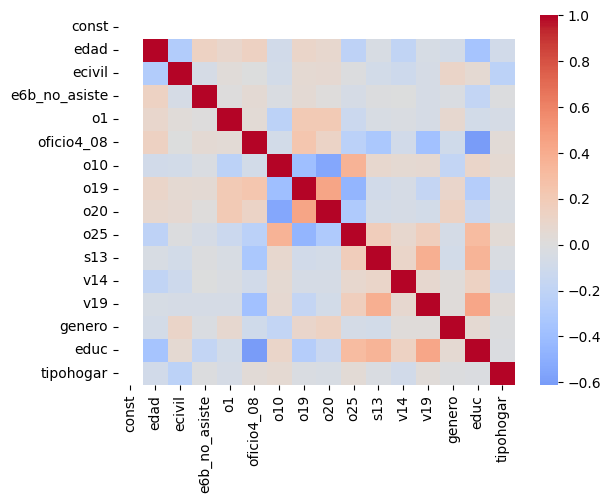

In [455]:
# Print model summary
print(model_forward.summary())

# Visualize the correlation matrix of selected features
selected_features_forward = X.columns[selector_forward.get_support()]
X_train_forward_df = pd.DataFrame(X_selected_forward, columns=['const'] + list(selected_features_forward))
sns.heatmap(X_train_forward_df.corr(), annot=False, cmap='coolwarm', center=0)
plt.show()

Obtener e Imprimirlas características seleccionadas


In [456]:
selected_features_forward = X.columns[selector_forward.support_]
print("Variables seleccionadas (hacia adelante):", selected_features_forward)

Variables seleccionadas (hacia adelante): Index(['edad', 'ecivil', 'e6b_no_asiste', 'o1', 'oficio4_08', 'o10', 'o19',
       'o20', 'o25', 's13', 'v14', 'v19', 'genero', 'educ', 'tipohogar'],
      dtype='object')


Error cuadrático medio (MSE)
Coeficiente de determinación (R²)

In [457]:
mse = mean_squared_error(y, model_forward.predict(X_selected_forward))
print("Error cuadrático medio (MSE):", mse)

r2 = r2_score(y, model_forward.predict(X_selected_forward))
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 0.027282822485588065
Coeficiente de determinación (R²): 0.5720788625297972


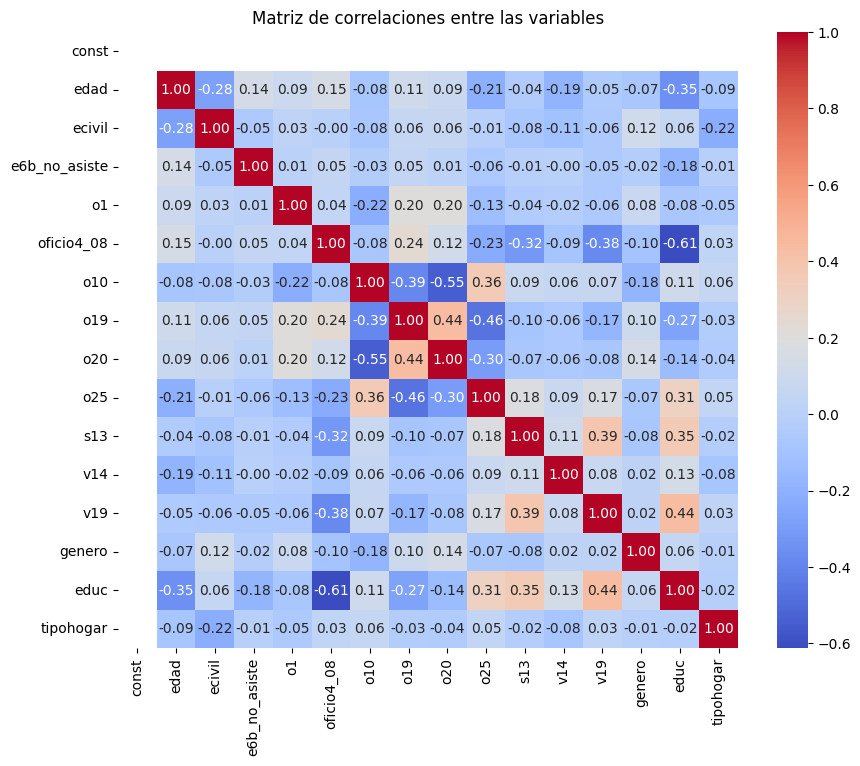

In [458]:
correlation_matrix = X_train_forward_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones entre las variables")
plt.show()
